In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car data.csv')

# Verify the column names
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


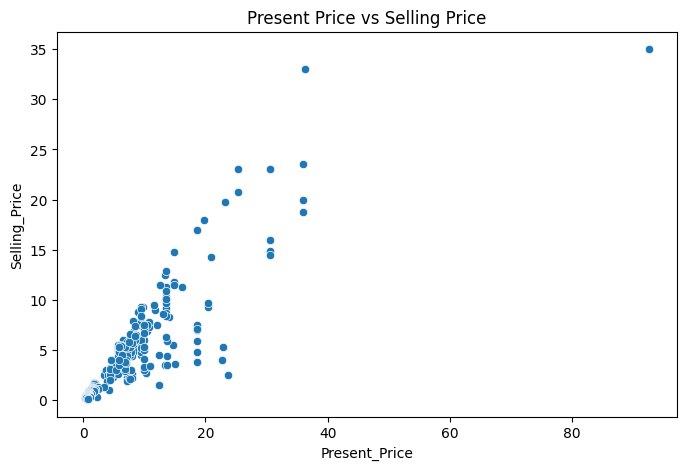

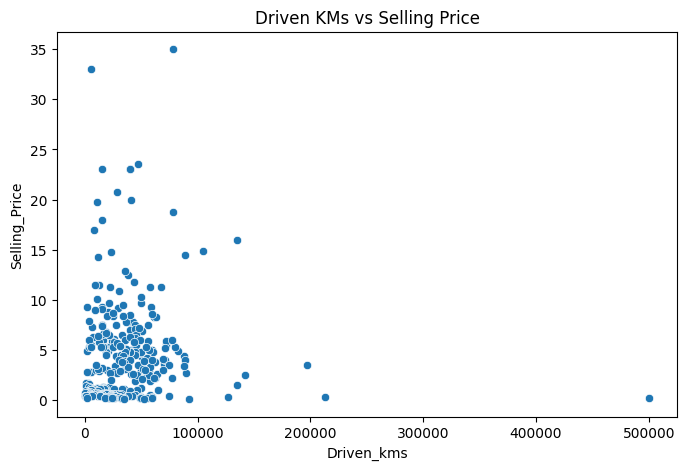

In [6]:
# Visualizing Present Price vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Present_Price', y='Selling_Price')
plt.title("Present Price vs Selling Price")
plt.show()

# Visualizing Mileage (Driven_kms) vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')
plt.title("Driven KMs vs Selling Price")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

# We will drop 'Car_Name' for this basic model as it has many unique values
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

Mean Absolute Error: 1.22 (Lakhs)
R-squared Score: 0.85


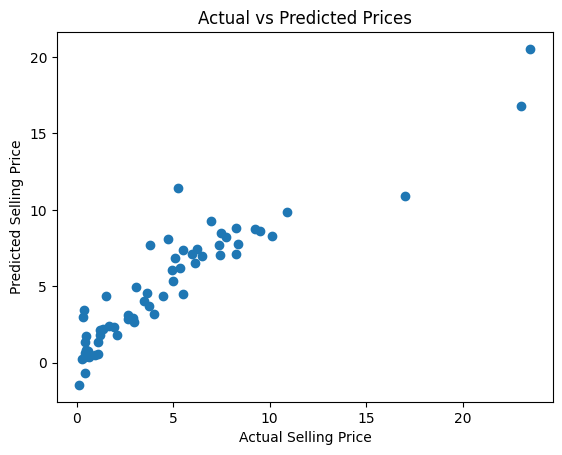

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

# Check how well the model performed
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae:.2f} (Lakhs)")
print(f"R-squared Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.scatter(y_test, predictions)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices")
plt.show()